# Import các thư viện

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

# Đọc dữ liệu

In [20]:
# Read data
df = pd.read_csv('winequality_red.csv')

In [21]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Tiền xử lý dữ liệu 

<h2> Đổi tên các trường

In [22]:
# Rename columns
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

In [23]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<h2>Kiểm tra các dữ liệu thiếu</h2>

In [24]:
# Check missing values
print('Total count of missing values:', df.isna().sum().sum())
print('Missing values per column:')
df.isna().sum()

Total count of missing values: 0
Missing values per column:


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

-> Vậy không có dữ liệu thiếu

<h2>Kiểm tra các dữ liệu trùng lặp</h2>

In [25]:
# Check duplicated rows
print("Số dòng trùng lặp:", df.duplicated().sum())
print("Phân bố quality trong dữ liệu trùng lặp:\n", df[df.duplicated()]['quality'].value_counts())

Số dòng trùng lặp: 240
Phân bố quality trong dữ liệu trùng lặp:
 quality
5    104
6    103
7     32
8      1
Name: count, dtype: int64


1. Số lượng trùng lặp hoàn toàn trong tệp dữ liệu là 240 dòng.
2. Tỉ lệ trùng lặp là 240/1599 sấp sỉ 15%. Là mộ tỉ lệ khá cao. Điều này ảnh hưởng tới việc mô hình hóa dữ liệu.
3. Đặc biệt khi xem phân bố trùng lặp ở quality trong dữ liệu ta thấy ở mức 5 và 6 có mức độ trùng lặp 104 và 103 nếu cho vào mô hình hóa sẽ bị thiên kiến. 

In [26]:
# Remove duplicates
df = df.drop_duplicates()

In [27]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


1. Sau khi sử lý dữ liệu trùng, lặp tệp dữ liệu còn 1359 dòng

In [28]:
# Display data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1359 non-null   float64
 1   volatile_acidity      1359 non-null   float64
 2   citric_acid           1359 non-null   float64
 3   residual_sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free_sulfur_dioxide   1359 non-null   float64
 6   total_sulfur_dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   ph                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


<h2>Kiểm tra dữ liệu ngoại lai</h2>

In [29]:
# Display data description
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


1. Dựa trên bản số liệu trên ta có thể thấy các biến "Free sulfur dioxide", "Total sulfur dioxide", "Sulphates" có thể có outliners. 

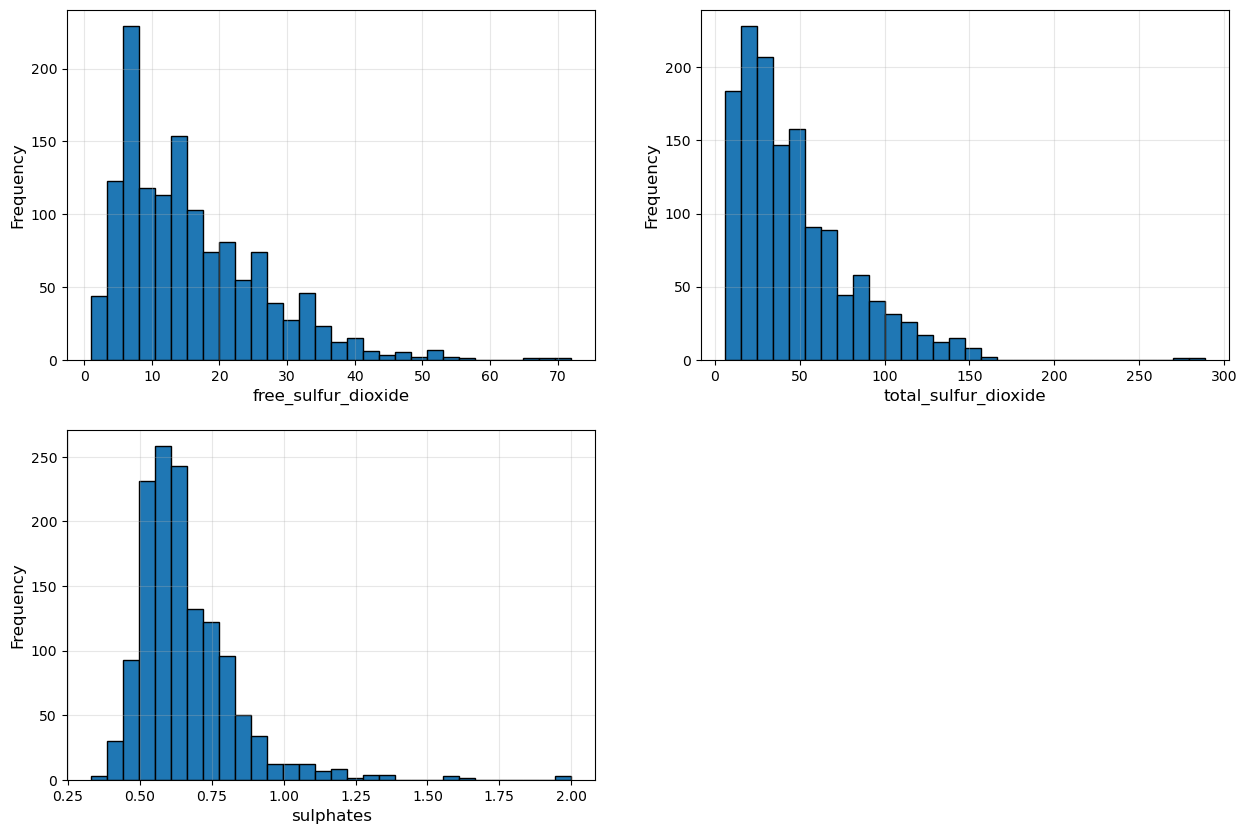

In [30]:
# Chọn các cột để vẽ histogram
columns_to_plot = ['free_sulfur_dioxide', 'total_sulfur_dioxide', 'sulphates']

# Tạo figure với kích thước lớn hơn (width=15, height=10)
plt.figure(figsize=(15, 10))

# Vẽ histogram cho từng cột
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)  # Sắp xếp 2x2
    plt.hist(df[column], bins=30, edgecolor='black')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, alpha=0.3)
# Hiển thị biểu đồ
plt.show()

1. Nhìn vào biểu đồ ta có thể thấy các trường đều có biến ngoại lai.
2. Dựa trên những kiến thức thực tế sau khi tìm hiểu về rượu:
   - free sulfur dioxide: có vai trò chất chống oxy hóa và kháng khuẩn, bảo vệ rượu khỏi hư hỏng. Mức độ có thể ảnh hưởng tới hương vị rượu
   - Total sulfur dioxide: là bao gồm free sulfur dioxide và sulfur dioxide. Phản án tổng lượng sulfur thêm vào quá trình sản xuất. Quá nhiều sẽ gây ra mùi khó chịu, nhwung nếu quá ít sẽ làm rượu oxy hóa.
   - sulphates: Nếu cho quá nhiều sẽ khiến rượu có mùi khó chịu và đau đầu ở người nhạy cảm
3. Vì vậy ta quyết định xóa đi dữ liệu ngoại lai

In [31]:
import pandas as pd

def remove_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Gọi hàm để xóa outliers
df_clean = remove_outliers_iqr(df)


In [32]:
df_clean

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<h2>Chuẩn hóa dữ liệu</h2>

In [33]:
# Lấy danh sách các cột số, trừ cột 'quality'
numeric_columns = [col for col in df_clean.select_dtypes(include=['float64', 'int64']).columns if col != 'quality']

# Khởi tạo DataFrame rỗng để lưu kết quả chuẩn hóa
df_normalized = pd.DataFrame(index=df_clean.index)

# Lặp qua từng cột số (trừ 'quality') để chuẩn hóa
for col in numeric_columns:
    col_min = df_clean[col].min()
    col_max = df_clean[col].max()
    
    if col_max != col_min:
        df_normalized[col] = df_clean[col].apply(lambda x: (x - col_min) / (col_max - col_min))
    else:
        df_normalized[col] = 0  # hoặc df_clean[col], nếu bạn muốn giữ nguyên giá trị
df_normalized['quality'] = df_clean['quality']

In [34]:
df_normalized

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,0.319444,0.651685,0.000000,0.285714,0.457831,0.256410,0.259259,0.67500,0.757143,0.377049,0.148936,5
1,0.375000,0.853933,0.000000,0.571429,0.722892,0.615385,0.564815,0.55000,0.314286,0.573770,0.234043,5
2,0.375000,0.719101,0.054795,0.448980,0.650602,0.358974,0.444444,0.57500,0.400000,0.524590,0.234043,5
3,0.847222,0.179775,0.767123,0.285714,0.445783,0.410256,0.500000,0.70000,0.257143,0.409836,0.234043,6
5,0.319444,0.606742,0.000000,0.244898,0.445783,0.307692,0.314815,0.67500,0.757143,0.377049,0.148936,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,0.236111,0.561798,0.109589,0.285714,0.361446,0.692308,0.296296,0.51375,0.628571,0.803279,0.170213,6
1594,0.152778,0.539326,0.109589,0.326531,0.626506,0.794872,0.351852,0.31250,0.671429,0.409836,0.382979,5
1595,0.111111,0.483146,0.136986,0.408163,0.289157,0.974359,0.416667,0.34000,0.771429,0.704918,0.531915,6
1597,0.111111,0.589888,0.164384,0.326531,0.445783,0.794872,0.351852,0.38375,0.842857,0.622951,0.319149,5


# Khám phá và phân tích dữ liệu

<h2> Biểu đồ nhiệt</h2>

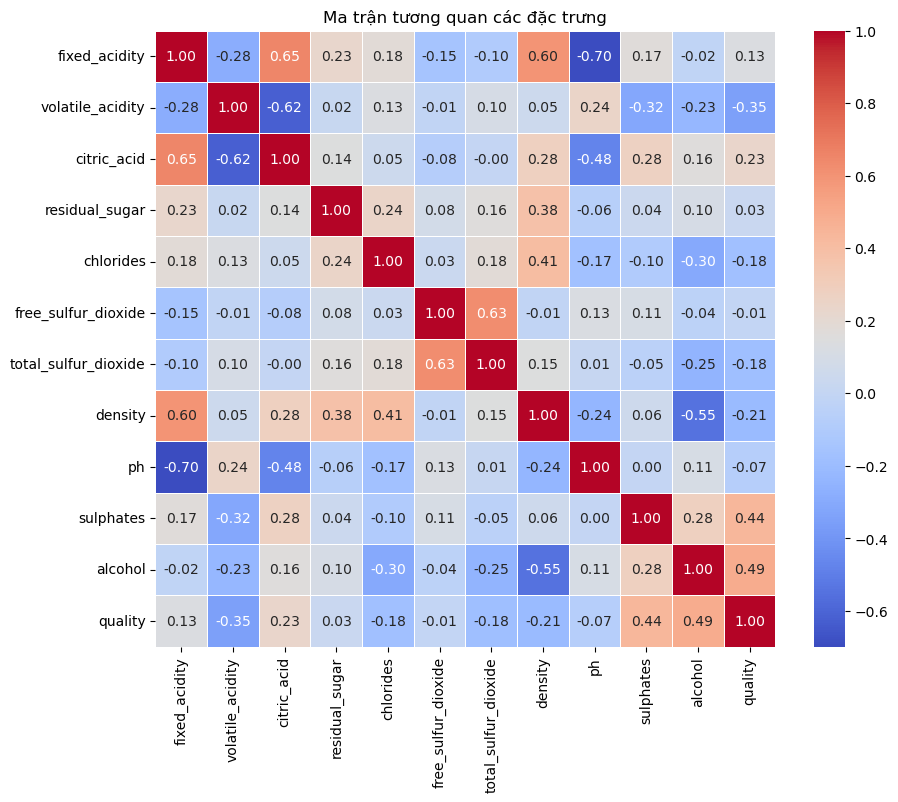

In [35]:
plt.figure(figsize=(10, 8))
corr_matrix = df_normalized.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Ma trận tương quan các đặc trưng')
plt.show()
plt.close()

1. Dựa trên biểu đồ nhiệt, ta có thể thấy các trường "free_sulfur_dioxide", "residual_sugar", "ph" là những trường có tầm quan trọng thấp nhât khi ảnh hưởng tới quality.
2. Cụ thể (theo kết quả tương quan trước đó):
- free sulfur dioxide: ~ -0.05
- residual sugar: ~ 0.01
- pH: ~ -0.06
3. Thực tế:
- Mặc dù free sulfur có vai trò quan trọng tới rượu nhưng trong tập dữ liệu, lại không ảnh hưởng rõ rệt. Có thể do mối qua hệ với chất lượng phưc tạp hơn (có thể phụ thuộc vào yếu tố khác như total sulfur dioxide)
- Residual sugar: Hàm lượng đường quan trọng với rượu trắng, nhưng với rượu vang thì sẽ ít ảnh hưởng với cảm nhận của người dùng
- pH có ảnh hưởng tới hương vị và ổn định của rượu, nhưng trong dữ liệu không tác động nhiều có lẽ vì các yếu tố khác như volatile acidity đã đại diện cho khía cạnh Axit
4. Chính vì vậy, ta quyết định xóa bớt 3 trường trên. 

In [36]:
columns_to_remove = ['free_sulfur_dioxide', 'residual_sugar', 'ph']

# Xóa các cột
df = df_normalized.drop(columns=columns_to_remove)
df


,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,density,sulphates,alcohol,quality
0,0.319444,0.651685,0.000000,0.457831,0.259259,0.67500,0.377049,0.148936,5
1,0.375000,0.853933,0.000000,0.722892,0.564815,0.55000,0.573770,0.234043,5
2,0.375000,0.719101,0.054795,0.650602,0.444444,0.57500,0.524590,0.234043,5
3,0.847222,0.179775,0.767123,0.445783,0.500000,0.70000,0.409836,0.234043,6
5,0.319444,0.606742,0.000000,0.445783,0.314815,0.67500,0.377049,0.148936,5
...,...,...,...,...,...,...,...,...,...
1593,0.236111,0.561798,0.109589,0.361446,0.296296,0.51375,0.803279,0.170213,6
1594,0.152778,0.539326,0.109589,0.626506,0.351852,0.31250,0.409836,0.382979,5
1595,0.111111,0.483146,0.136986,0.289157,0.416667,0.34000,0.704918,0.531915,6
1597,0.111111,0.589888,0.164384,0.445783,0.351852,0.38375,0.622951,0.319149,5


<h2>Phương pháp Feature Importance (Random forest)</h2>


In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
# Tách features và target
X = df.drop('quality', axis=1)
y = df['quality']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [41]:
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Tầm quan trọng đặc trưng từ Random Forest:")
print(feature_importance)

Tầm quan trọng đặc trưng từ Random Forest:
alcohol                 0.282154
sulphates               0.176147
volatile_acidity        0.120727
total_sulfur_dioxide    0.112812
chlorides               0.085535
fixed_acidity           0.079174
density                 0.073676
citric_acid             0.069775
dtype: float64


<h2> Phương pháp Permutation Importance</h2>

In [42]:
perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
perm_importance_series = pd.Series(perm_importance.importances_mean, index=X.columns).sort_values(ascending=False)
print("\nTầm quan trọng đặc trưng từ Permutation Importance:")
print(perm_importance_series)


Tầm quan trọng đặc trưng từ Permutation Importance:
alcohol                 0.329727
sulphates               0.176911
volatile_acidity        0.058943
total_sulfur_dioxide    0.033143
density                 0.016601
fixed_acidity           0.015725
citric_acid             0.010015
chlorides              -0.009677
dtype: float64


<h2>Kết luận dựa trên 2 phương pháp</h2>

In [43]:
# Combine important features from both methods
threshold = 0.05
important_features_rf = feature_importance[feature_importance > threshold].index
important_features_perm = perm_importance_series[perm_importance_series > threshold].index
important_features = important_features_rf.intersection(important_features_perm)
print("\nKết luận: Các đặc trưng quan trọng (kết hợp cả hai phương pháp, ngưỡng 0.05):")
print(important_features)


Kết luận: Các đặc trưng quan trọng (kết hợp cả hai phương pháp, ngưỡng 0.05):
Index(['alcohol', 'sulphates', 'volatile_acidity'], dtype='object')


# Sử dụng mô hình SVM

In [44]:
# Chuẩn bị dũ liệu cho SVM
X = df[['alcohol', 'sulphates', 'volatile_acidity']]
y = (df['quality'] >= 7).astype(int)

In [45]:
# chia data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
# Check label distribution
print("Phân bố nhãn trong tập huấn luyện:")
print(y_train.value_counts(normalize=True))

Phân bố nhãn trong tập huấn luyện:
quality
0    0.878049
1    0.121951
Name: proportion, dtype: float64


In [48]:
# Train and tune SVM
svm = SVC(kernel='rbf', class_weight='balanced', random_state=42)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1]
}
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1]},
             scoring='f1')

In [49]:
# In ra parameters tốt nhất
print("Tham số tốt nhất:", grid_search.best_params_)

Tham số tốt nhất: {'C': 0.1, 'gamma': 0.1}


In [50]:
# Get best model
best_svm = grid_search.best_estimator_

In [51]:
#  SVM
y_pred = best_svm.predict(X_test_scaled)
print("Báo cáo phân loại SVM:")
print(classification_report(y_test, y_pred, target_names=['Không tốt', 'Tốt']))

Báo cáo phân loại SVM:
              precision    recall  f1-score   support

   Không tốt       1.00      0.72      0.84       174
         Tốt       0.30      1.00      0.46        21

    accuracy                           0.75       195
   macro avg       0.65      0.86      0.65       195
weighted avg       0.92      0.75      0.80       195



In [80]:
# thử ví dụ
new_wine = pd.DataFrame({
    'alcohol': [11.0],
    'sulphates': [0.75],
    'volatile_acidity': [0.5]
})
new_wine_scaled = scaler.transform(new_wine)
prediction = best_svm.predict(new_wine_scaled)
print("Dự đoán cho chai rượu mới:", "Tốt" if prediction[0] == 1 else "Không tốt")

Dự đoán cho chai rượu mới: Không tốt
